<a href="https://colab.research.google.com/github/1991Ab/Capstone-Project-3-Credit-Card-Default-Prediction/blob/main/DefaultCreditCcard_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction**







##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


This project is aimed at predicting the case of customers default payments in Taiwan.

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

We can use the K-S chart to evaluate which customers will default on their credit card payments

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 KB 10.5 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing the dataset
file_path = "/content/drive/MyDrive/Capstone project 3/default of credit card clients.xls"
df = pd.read_excel(file_path)


### Dataset First View

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns 
df.shape

(30001, 25)

The given dataset of Default Credit Card Payment has 30001 rows and 25 columns.

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

We find that there are  no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


<AxesSubplot:>

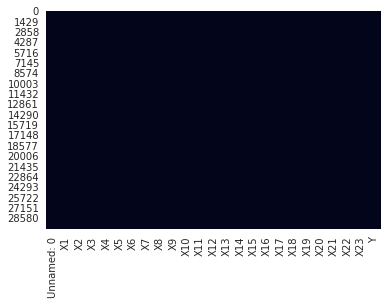

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

From the above code it is seen that there are no null values in the dataset.

### What did you know about your dataset?

The  dataset given is details of customers and their credit card payment details.The objective of our project is to predict which customer might default in crdit card payments in upcoming months.This dataset has 30001 rows and 25 columns.It has no duplicate and no null values.

In [ ]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


The above code shows the description of each variables in the dataset.

### Variables Description 

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
*X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
*X4: Marital status (1 = married; 2 = single; 3 = others).
*X5: Age (year).
*X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
*X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
*X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
*Default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  Unnamed: 0 is 30001
No. of unique values in  X1 is 82
No. of unique values in  X2 is 3
No. of unique values in  X3 is 8
No. of unique values in  X4 is 5
No. of unique values in  X5 is 57
No. of unique values in  X6 is 12
No. of unique values in  X7 is 12
No. of unique values in  X8 is 12
No. of unique values in  X9 is 12
No. of unique values in  X10 is 11
No. of unique values in  X11 is 11
No. of unique values in  X12 is 22724
No. of unique values in  X13 is 22347
No. of unique values in  X14 is 22027
No. of unique values in  X15 is 21549
No. of unique values in  X16 is 21011
No. of unique values in  X17 is 20605
No. of unique values in  X18 is 7944
No. of unique values in  X19 is 7900
No. of unique values in  X20 is 7519
No. of unique values in  X21 is 6938
No. of unique values in  X22 is 6898
No. of unique values in  X23 is 6940
No. of unique values in  Y is 3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df_new
df_new=df.copy()
df_new.shape

(30000, 25)

In [ ]:
df_new.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
#Renaming the target variable for the ease of use
df.rename(columns = {'default payment next month': 'Is_defaulters'}, inplace = True)

### Analysing the count of customers who have more than three months of due repayment in the recent month occured that is September.

In [ ]:
len(df[df["PAY_0"] >=3])

463

From the above analysis we can see that there are 463 cutomers who have more than 3 months due of payment in the month of september.

### Now, I shall analyse the number of males and females who have more than three months due of payment in the month of September.

In [ ]:
due_september=df[df["PAY_0"]>=3]
due_september

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
130,130,60000,1,3,1,55,3,2,2,0,...,28853,29510,26547,2504,7,1200,1200,1100,1500,0
160,160,50000,1,3,1,57,3,2,0,0,...,13427,13711,14083,0,1600,500,500,600,600,0
270,270,50000,1,2,2,27,3,2,2,0,...,13968,14319,2614,1700,0,426,501,2614,1390,1
293,293,30000,1,2,1,43,3,2,2,2,...,2182,2000,2566,1100,0,300,0,600,0,0
319,319,50000,2,3,1,46,3,2,2,0,...,29742,29898,24883,3754,1,1070,1030,863,654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,29815,50000,1,2,2,49,5,4,3,2,...,48640,17450,60,0,0,0,2000,1003,1076,0
29927,29927,50000,1,3,1,46,3,3,2,0,...,50033,9779,9924,0,7,1104,445,400,204,0
29945,29945,80000,1,2,2,39,3,2,0,0,...,23867,23130,0,0,2968,1867,463,0,0,1
29992,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1


In [ ]:
due_september.groupby("SEX")["ID"].count().reset_index()

,SEX,ID
0,1,242
1,2,221


From the above analysis it is clear  that the male customers are more in number than females in the due payment list (of more than three months)in the recent month that is September.The number of male defaulters is 242 and female defaulters is 221.

### Now,I shall analyse the average age of custmers who are using Credit card

In [ ]:
defaulter_age=df.groupby("Is_defaulters")["AGE"].mean().round()
defaulter_age.reset_index()

,Is_defaulters,AGE
0,0,35.0
1,1,36.0


From the above code we can see that the average age of customers who are not defaulters of payment is 35.The average age of cutomer who are  defaulters of paynent is 36

### Analysing the count of customers who have duly payed the credit bills of all the months.

In [ ]:
duly_paid=df[(df["PAY_0"] == 1) | (df["PAY_2"] == 1) | (df["PAY_3"] == 1) | (df["PAY_4"] == 1) | (df["PAY_5"] == 1 ) | (df["PAY_6"] == 1)]
duly_paid.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_defaulters
14,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,16,50000,2,3,3,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0


In [ ]:
len(duly_paid)

3688

From the above code we see that there are 3688 customers who have duly paid all the bills of all the months.

Analysing the education of the customers

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others

In [ ]:
= (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

### Hypothesis testing

In [ ]:
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='left':
      return z
    elif tailed == 'right':
      return 1-z
    elif tailed == 'two_tailed':
      if z > 0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

In a random sample of 500 customers picked , the male percent of defaulters is found to be 60%.Find the test statistic for the claim that majority of defaulters are males.

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Ho < = 50

Alternate Hypothesis : Ha > 50

Test Type: Right Tailed Test

In [ ]:
sample_1=df[(df["Is_defaulters"]==1) & (df["SEX"] == 1)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
n=500
actual_value=60

In [ ]:
# Getting Z value
z = (actual_value - hypothesis_number)/math.sqrt(hypothesis_number)*(1-hypothesis_number)/n
# Getting P - Value
p = p_value(z=z,tailed='right',t="false",hypothesis_number=hypothesis_number,df=sample_1,col="SEX")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.5551140844322191.


### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found out the P-value to be 0.55 which is greater than the significance level of 0.05. Hence deriving the conclusion as "Failed To reject the Null Hypothesis.
That is we come to the conclusion that Male percent of defaulters is less than or equal to 50%

### Why did you choose the specific statistical test?

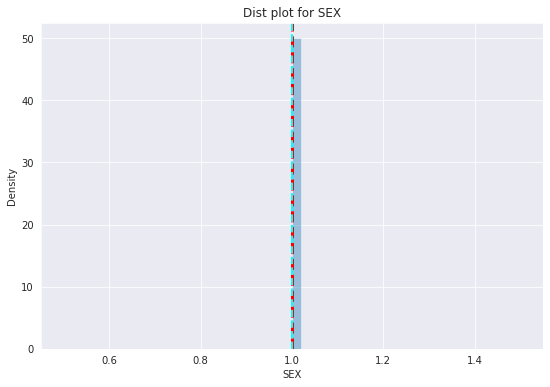

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= sample_1["SEX"]
sns.distplot(feature)
ax.axvline(feature.mean(),color='red', linestyle='dashed', linewidth=3)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Dist plot for SEX")
plt.show()

In [ ]:
sample_1["SEX"].mean()

1.546

In [ ]:
sample_1["SEX"].median()

2.0

The differnce between the mean and meadian is  less.Hence it is almost a Normal distribution.Also the sample size is also comparitively more.Hence I Have used Z-Test to obtain the statistics

### Hypothetical Statement - 2

The average limit balance of  credit card of  female  non-defaulters is 20,000

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Ho = 20,000

Alternate Hypothesis : Ha != 20,000

Test Type : Two Tailed Test

In [ ]:
sample_2=df[(df["SEX"]==2) & (df["Is_defaulters"]==0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 20000

In [ ]:
sample_2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_defaulters
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
11,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,29179,90000,2,3,2,60,-1,-1,-1,0,...,27878,27243,27799,63201,5322,26400,545,556,1274,0
29182,29182,170000,2,3,1,57,0,0,0,0,...,164366,124387,120529,7300,8000,7800,4600,5000,5100,0
29183,29183,280000,2,1,1,56,-2,-2,-2,-2,...,12492,3464,3936,4811,9957,12492,3469,3936,3845,0
29186,29186,50000,2,3,2,55,2,0,0,0,...,17087,17119,17602,1243,1267,1580,612,758,700,0


In [ ]:
sample_mean = sample_2.mean()
n = len(sample_2)

In [ ]:
sample_2["LIMIT_BAL"]=pd.to_numeric(sample_2["LIMIT_BAL"])
#type(df["LIMIT_BAL"])

In [ ]:
z,p_value=stats.ttest_1samp(sample_2["LIMIT_BAL"],hypothesis_number)

In [ ]:
print(z)
print(p_value)

151.34836219365224
0.0


In [ ]:
print(conclusion(p_value))

Null Hypothesis rejected Successfully for p = 0.0


### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical test to obtain P-Value and found out that the P-value is less than the significance level.Hence rejecting the Null hypothesis sucessfully.

### Why did you choose the specific statistical test?

In [ ]:
sample_2["LIMIT_BAL"].mean()-sample_2["LIMIT_BAL"].median()

19726.531465607346

From the above code we can see that there is a huge difference between mean and median.Hence the data is skewed and not Normally distributed.We cannot perform z-test for skewed data.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.